<a href="https://colab.research.google.com/github/Swathi201801150/Mini-Project/blob/main/Mini_Project_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 1.27 ms (started: 2021-04-23 05:46:18 +00:00)


In [2]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists
time: 121 ms (started: 2021-04-23 05:46:21 +00:00)


In [3]:
!pip install scikit-image

time: 3.34 s (started: 2021-04-23 05:46:23 +00:00)


In [4]:
# Preprocessing
# 1. Resize
# 2. Flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

time: 442 ms (started: 2021-04-23 05:46:28 +00:00)


In [5]:
target = []
images = []
flat_data = []

time: 1.1 ms (started: 2021-04-23 05:46:30 +00:00)


In [6]:
DATADIR = '/content/images'
CATEGORIES = ['banana','orange','apple']

time: 1.65 ms (started: 2021-04-23 05:46:32 +00:00)


In [7]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding the values
  path = os.path.join(DATADIR,category) # Create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
    

time: 29.3 s (started: 2021-04-23 05:46:34 +00:00)


In [8]:
len(flat_data[0])

67500

time: 11.3 ms (started: 2021-04-23 05:47:54 +00:00)


In [9]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 5.68 ms (started: 2021-04-23 05:47:56 +00:00)


<BarContainer object of 3 artists>

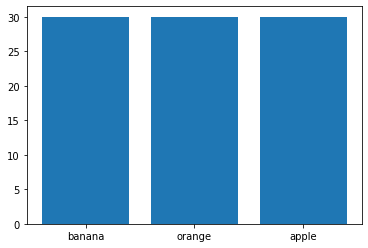

time: 177 ms (started: 2021-04-23 05:47:58 +00:00)


In [10]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [11]:
# Split data into Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 76 ms (started: 2021-04-23 05:47:59 +00:00)


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

time: 23.9 ms (started: 2021-04-23 05:48:00 +00:00)


In [13]:
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 2min 3s (started: 2021-04-23 05:48:02 +00:00)


In [14]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 1, 1])

time: 209 ms (started: 2021-04-23 05:50:11 +00:00)


In [15]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 10.3 ms (started: 2021-04-23 05:50:13 +00:00)


In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1 ms (started: 2021-04-23 05:50:14 +00:00)


In [17]:
accuracy_score(y_pred,y_test)

0.8888888888888888

time: 9.3 ms (started: 2021-04-23 05:50:16 +00:00)


In [18]:
confusion_matrix(y_pred,y_test)

array([[ 7,  0,  2],
       [ 1, 11,  0],
       [ 0,  0,  6]])

time: 11 ms (started: 2021-04-23 05:50:17 +00:00)


In [19]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 75.7 ms (started: 2021-04-23 05:50:19 +00:00)


In [20]:
model = pickle.load(open('img_model.p','rb'))

time: 26 ms (started: 2021-04-23 05:50:21 +00:00)


Enter your URLhttps://i.pinimg.com/originals/05/79/5a/05795a16b647118ffb6629390e995adb.jpg
(597, 650, 3)
PREDICTED OUTPUT: orange


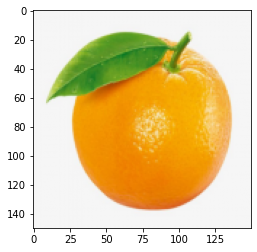

time: 34.4 s (started: 2021-04-23 05:50:23 +00:00)


In [21]:
# Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [22]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet

from pyngrok import ngrok

time: 6.81 s (started: 2021-04-23 05:51:11 +00:00)


In [34]:
# Deployment :
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image Classifier using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image....", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['banana','orange','apple']
    st.write('Result....')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}')


Overwriting app.py
time: 20.6 ms (started: 2021-04-23 06:21:06 +00:00)


In [27]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://3431cb46ed4a.ngrok.io'

time: 190 ms (started: 2021-04-23 05:58:51 +00:00)
